In [3]:
import numpy as np
import torchvision
import torch
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [6]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,),(0.5,))
                              ])

In [17]:
trainset = datasets.MNIST('training-data', download=True, train=True, transform = transform)
valset = datasets.MNIST('training-data', download=True, train=False, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [9]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


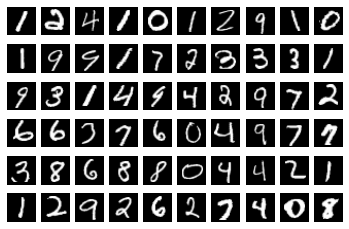

In [21]:
figure = plt.figure()
for i in range(1, 61):
    plt.subplot(6, 10, i)
    plt.axis('off')
    plt.imshow(images[i].numpy().squeeze(), cmap='gray')

In [23]:
input_size = 28*28
hidden_sizes = [128, 64]
output_size = 10

# model
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))

# cross-entropy loss for the model train (using negative log-likelihood loss)
criterion = nn.NLLLoss()
images, lables = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) # log probability
loss = criterion(logps, labels) # calculate the NN loss